# **Battle of Neighborhoods**

## Saint Louis, Missouri 


### **Project Description:** 
Whenever people move to any other place, they explore the place and try to fetch as much information as possible about it. It can be the neighborhood, locality, market, price of the place and many more factors including neighborhood analysis. While many factors can be taken into account for when determining the optimal area in a given city, such as population rate, median house price, school ratings, crime rates, and others, the happiness of where one dwells is often determined by the experiences had in a location and the ease of having those experiences. Furthermore, while factoring in school ratings may be important for a young family with children, it may not be that important to a college student or young professional. <br>

While there are many different hobbies and interests which appeal to people, food is a common connection for all groups of people. Often we seek comfort food in times of stress, share food when meeting new people, and celebrate important events with food. Few other things are universally common and celebrated as food. It is also a difficult but profitable buisness if the time is taken to maximize the chances of success. Much of the chance of success of any new business is location. <br>

The goal of this project is to help a potential user pick an optimal area to open a new ethnic restaurante based on the on the variety and number of food venues in conjunction with a cluster analysis of the neighborhoods of the city. The idea is that areas with lower food diversity will have less competition for certain styles of cuisine. In addition, an area with fewer food venues, will naturally be a better place for any restaurant to open. This will save the user both time and effort as it will establish likely locations which will allow the user to then focus on certain areas of the city. <br>
 

### **Data Sets and APIs:** 

• Foursquare API:
The Foursquare API allows access to a database of more than 105 million places. The majority of the data for this project will come from that databased. It is already being used to get-tag photos, explore new areas, or just to determine a great place to get dinner. This API provides the ability to perform location search, location sharing and details about a business. 

• Work Flow:
Given how spread out the city of Saint Louis is, it made more sense to work from zip codes opposed to area names. The necessary area names and zip codes have been web scraped using the beautifulsoup library. Geospactial coordinates were found using argis with geocoder. HTTP requests were made to the Foursquare API using the zip codes which were web scraped. The first 100 venues for each zipcode were pulled. Again, give the spread out nature of the city, the radius of the query was set to 5 miles. 

• Folium-Python visualization library would be used to observe the neighborhoods cluster distribution of Saint Louis over an interactive map. 

• Unsupervised machine learning algorithm, K-mean clustering, will be applied to determine the clusters of differnt zip codes from the different categories of places in each area. 

### **Python packages and Dependencies:** 

• Pandas - Library for Data Analysis 
• NumPy – Library to handle data in a vectorized manner
• beautifulsoup – Library to web scraping activities 
• Geopy – To retrieve Location Data 
• Requests – Library to handle http requests
• Matplotlib – Python Plotting Module 
• Sklearn – Python machine learning Library 
• Folium – Map rendering Library

Continueing the project from the last notebook, we have successfully web scraped the postal codes for the greater Saint Louis metro area. Then we used geocoder to pull the longitude and latitudes for each postal code. Now we will explore that generated data set, using the analysis used in the lab for an guide. First we will get all our dependencies:

In [56]:
import numpy as np
import pandas as pd
import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.1.23-0, anaconda::openssl-1.1.1b-he774522_1
  - anaconda::openssl-1.1.1b-he774522_1, defaults::ca-certificates-2019.1.23-0
  - anaconda::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1
  - defaults::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1done

# All requested packages already installed.

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.1.23-0, anaconda::openssl-1.1.1b-he774522_1
  - anaconda::openssl-1.1.1b-he774522_1, defaults::ca-certificates-2019.1.23-0
  - anaconda::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1
  - defaults::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1done

# All requested packages already installed.

Libraries imported.


Now lets import our data set from the last notebook:

In [355]:
df = pd.read_csv (r'C:\Users\John\Desktop\notebooks\STL_cords.csv')
df = df.drop('Unnamed: 0', axis=1)
df['ZipCode'] = df['ZipCode'].astype(str) 
df.head()

,ZipCode,AreaName,Latitude,Longitude
0,63005,Chesterfield,38.656650,-90.586180
1,63011,Ballwin,38.600194,-90.542303
2,63017,Chesterfield,38.677780,-90.507360
3,63021,Ballwin,38.564928,-90.523348
4,63026,Fenton,38.495220,-90.427090


Now we will need to pull the geospatial coordinates of the city of Saint Louis

In [356]:
address = 'Saint Louis, MO'

geolocator = Nominatim(user_agent="STL_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Saint Louis are {}, {}'.format(latitude, longitude))

The geograpical coordinate of Saint Louis are 38.6268039, -90.1994097


In [556]:
map_STL = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode, areaname in zip(df['Latitude'], df['Longitude'], df['ZipCode'], df['AreaName']):
    label = '{}, {}'.format(zipcode, areaname)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_STL)  
    
map_STL



Lets go ahead and define Foursquare Credentials and Version:

In [358]:
CLIENT_ID = 'LPRKJCXB2AZSNVAAPYWFR4MYLWKPTLZMC2BA5RIF3KTA3AOK' # your Foursquare ID
CLIENT_SECRET = '4WWX2K1341BS3PL1K3V0EI2PUTTYEV2J3BOWN3RPIKHWGU5I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LPRKJCXB2AZSNVAAPYWFR4MYLWKPTLZMC2BA5RIF3KTA3AOK
CLIENT_SECRET:4WWX2K1341BS3PL1K3V0EI2PUTTYEV2J3BOWN3RPIKHWGU5I


Also, lets go ahead and define a function to pull venues. Anything to make the work easier! We will assume a search radius of 5 miles or 8046.72 feet.

In [359]:
def getNearbyVenues(zipcode, area, latitudes, longitudes, radius=8046.72):
    LIMIT=100
    venues_list=[]
    for zipcode, area, lat, lng in zip(zipcode, area, latitudes, longitudes):
        print(zipcode)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            zipcode, 
            area,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ZipCode', 
                  'AreaName',       
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [360]:
STL_venues = getNearbyVenues(zipcode=df['ZipCode'],
                                   area=df['AreaName'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

63005
63011
63017
63021
63026
63031
63033
63034
63038
63042
63043
63044
63045
63049
63074
63088
63101
63102
63103
63104
63105
63106
63107
63108
63109
63110
63111
63112
63113
63114
63115
63116
63117
63118
63119
63120
63121
63122
63123
63124
63125
63126
63127
63128
63129
63130
63131
63132
63133
63134
63135
63136
63137
63138
63139
63140
63141
63143
63144
63146
63147
63155
63301
63303
63376


In [361]:
print(STL_venues.shape)
STL_venues.head()

(6395, 8)


,ZipCode,AreaName,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,63005,Chesterfield,38.65665,-90.58618,Annie Gunn's Restaurant,38.667989,-90.579965,Steakhouse
1,63005,Chesterfield,38.65665,-90.58618,Jewish Community Center,38.660910,-90.580882,Gym
2,63005,Chesterfield,38.65665,-90.58618,Jersey Mike's Subs,38.668891,-90.598396,Sandwich Place
3,63005,Chesterfield,38.65665,-90.58618,The Smoke House Market,38.668000,-90.580103,Food & Drink Shop
4,63005,Chesterfield,38.65665,-90.58618,St. Louis Bread Company,38.668002,-90.591925,Café


Great! We now have around 6 thousand venues. Lets refine this more to limit it to only venues with food.

So lets first get a list of all the unique category names.

In [554]:
Uniquecat=STL_venues['Venue Category'].unique()
print(Uniquecat.size)

235


Wow that is a lot of Variety! Well lets make a list of all the venue categories that dont have food. 

In [447]:
nofood=['Liquor Store', 'Grocery Store', 'Park', 'Lake', 'Dive Bar', 'Beer Garden','Dog Run','Bed & Breakfast', 'Auto Dealership', 'Farmers Market', 'State / Provincial Park', 'Jewelry Store', 'Gym / Fitness Center', 'Movie Theater', 'Supermarket', 'Ski Area', 'Plaza', 'Motorsports Shop', 'Trail','Climbing Gym', 'Sculpture Garden', 'Museum', 'Gym', 'Beer Store', 'Cosmetics Shop', 'Wine Shop', 'Spa', 'Gym Pool', 'Salon / Barbershop', 'Warehouse Stor', 'Butcher', 'Pet Store', 'Shoe Store', 'Garden', 'Botanical Garden', 'Boutique', 'Zoo', 'Art Museum', 'Hotel', 'Rock Club', 'Convenience Store', 'Bookstore', 'Video Game Store', 'Golf Course', 'Discount Store', 'Furniture / Home Store', 'Go Kart Track', 'History Museum', 'Racetrack', 'Sporting Goods Shop', 'Pharmacy', 'Campground', 'Scenic Lookout', 'Arts & Crafts Store', 'Motorcycle Shop', 'General Entertainment', 'Department Store', 'Farm', 'Miscellaneous Shop', 'Hardware Store', 'Hardware Store', 'Big Box Store', 'Nature Preserve', 'Gas Station', 'Kids Store', 'ATM', 'Clothing Store', 'Video Store', 'Rest Area', 'Baseball Field', 'Construction & Landscaping', 'Theme Park', 'Theme Park Ride / Attraction', 'Resort', 'Flower Shop', 'Historic Site', 'Lingerie Store', 'Music Venue', 'Beach', 'Theater', 'Concert Hall', 'Planetarium', 'Indie Movie Theater', 'Jazz Club', 'Harbor / Marina', 'Home Service', 'Toy / Game Store', 'Record Shop', 'Bowling Alley', 'Bank', 'Fabric Shop', "Women's Store", 'Athletics & Sports', 'Print Shop', 'Paper / Office Supplies Store', 'Travel & Transport', 'Motel', 'Hockey Arena', 'Comic Shop', 'Opera House', 'Monument / Landmark', 'Monument / Landmark', 'Science Museum', 'Shipping Store', 'Thrift / Vintage Store', 'Pool', 'Flea Market', 'Airport Service', 'Automotive Shop', 'Hobby Shop', 'Mountain', 'Outdoors & Recreation', 'Business Service', 'River', 'Boat or Ferry', 'Warehouse Store', 'Shopping Mall', 'Gymnastics Gym', 'Massage Studio', 'Track', 'Antique Shop', 'Yoga Studio', 'Gun Range', 'Playground', 'Indoor Play Area', 'Rental Car Location', 'Gift Shop', 'Market', 'Optical Shop', 'Tree', 'Camera Store', 'Health & Beauty Service', 'Mobile Phone Shop', 'Office', 'Soccer Field', 'Water Park', 'Martial Arts Dojo', 'Arcade', 'Shop & Service', 'Soccer Stadium', 'Accessories Store', 'Apres Ski Bar', "Men's Store", 'Performing Arts Venue', 'Skating Rink', 'Intersection', 'Train Station', 'Fishing Spot', 'Event Space', 'Tanning Salon', 'Nail Salon', 'School', 'Electronics Store', 'Music Store', 'Convention Center', 'Outdoor Sculpture', 'Art Gallery', 'Auto Workshop','Shopping Plaza', 'Disc Golf', 'Football Stadium', 'Multiplex','Smoke Shop', 'Tourist Information Center', 'Other Repair Shop', 'Garden Center', 'Carpet Store', 'Other Great Outdoors', 'Airport', 'Church', 'Supplement Shop', 'Advertising Agency', 'Baseball Stadium', 'Hotel Bar', 'College Basketball Court', 'College Rec Center', 'Stables', 'Exhibit', 'Zoo Exhibit', 'Factory', 'Medical School', 'Community Center', 'High School', 'Chocolate Shop', 'Nightclub', 'Bridge', 'Bus Station', 'Stadium', 'College Hockey Rink', 'Fair', 'Skate Park', 'Gay Bar', 'Piano Bar']
food_venues = STL_venues[~STL_venues['Venue Category'].isin(nofood)]

In [555]:
Uniquecat=food_venues['Venue Category'].unique()
print(Uniquecat.size)

83


Great, we have removed all other types of venues so we can get an accurate count. 

In [553]:
food_venues.head()
print(food_venues.shape)

(3863, 8)


Ok now we will calculate the diversity of food options by simply totaling the number of unique venue categories left in each area. 

In [551]:
fooddiv = food_venues.groupby('ZipCode')['Venue Category'].nunique()
fooddiv = fooddiv.to_frame().reset_index()
fooddiv.rename(columns={'Venue Category':'Diversity'}, inplace=True)
holder=[]
holder=food_venues.groupby('ZipCode')['Venue Category'].agg('count').to_frame('All Ven').reset_index()
fooddiv['All Ven']=holder['All Ven']
fooddiv.head()


,ZipCode,Diversity,All Ven
0,63005,31,58
1,63011,28,58
2,63017,33,60
3,63021,31,66
4,63026,26,63


In [451]:
print('There are {} uniques categories.'.format(len(STL_venues['Venue Category'].unique())))

There are 235 uniques categories.


In [452]:
# One hot encoding

STL_onehot = pd.get_dummies(STL_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
STL_onehot['ZipCode'] = STL_venues['ZipCode'].astype(str) 

# move neighborhood column to the first column
fixed_columns = [STL_onehot.columns[-1]] + list(STL_onehot.columns[:-1])
STL_onehot = STL_onehot[fixed_columns]
STL_onehot.head()

,ZipCode,ATM,Accessories Store,Advertising Agency,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,63005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,63005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,63005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [453]:
STL_onehot.shape

(6395, 236)

In [454]:
STL_grouped = STL_onehot.groupby('ZipCode').mean().reset_index()
STL_grouped.head()

,ZipCode,ATM,Accessories Store,Advertising Agency,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,63005,0.0,0.0,0.0,0.0,0.05,0.00,0.00,0.0,0.0,...,0.00,0.01,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0
1,63011,0.0,0.0,0.0,0.0,0.03,0.00,0.00,0.0,0.0,...,0.00,0.01,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,63017,0.0,0.0,0.0,0.0,0.06,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0
3,63021,0.0,0.0,0.0,0.0,0.10,0.00,0.00,0.0,0.0,...,0.01,0.01,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0
4,63026,0.0,0.0,0.0,0.0,0.09,0.01,0.02,0.0,0.0,...,0.00,0.01,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [455]:
STL_grouped.shape

(65, 236)

In [456]:
num_top_venues = 5
for hood in STL_grouped['ZipCode'][:10]:
    print("----"+hood+"----")
    temp = STL_grouped[STL_grouped['ZipCode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----63005----
                  venue  freq
0  Fast Food Restaurant  0.07
1   American Restaurant  0.05
2    Italian Restaurant  0.05
3        Sandwich Place  0.04
4         Grocery Store  0.04


----63011----
                venue  freq
0         Pizza Place  0.07
1  Mexican Restaurant  0.06
2       Grocery Store  0.06
3         Coffee Shop  0.03
4                Park  0.03


----63017----
                 venue  freq
0       Sandwich Place  0.07
1  American Restaurant  0.06
2        Grocery Store  0.06
3                 Park  0.05
4   Italian Restaurant  0.05


----63021----
                 venue  freq
0  American Restaurant  0.10
1          Pizza Place  0.07
2       Sandwich Place  0.05
3          Coffee Shop  0.05
4                 Park  0.05


----63026----
                  venue  freq
0   American Restaurant  0.09
1    Italian Restaurant  0.07
2  Fast Food Restaurant  0.06
3           Pizza Place  0.04
4    Mexican Restaurant  0.04


----63031----
                venue  freq
0 

In [457]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [458]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['ZipCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

STL_venues_sorted = pd.DataFrame(columns=columns)
STL_venues_sorted['ZipCode'] = STL_grouped['ZipCode']

for ind in np.arange(STL_grouped.shape[0]):
    STL_venues_sorted.iloc[ind, 1:] = return_most_common_venues(STL_grouped.iloc[ind, :], num_top_venues)

STL_venues_sorted.head()

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63005,Fast Food Restaurant,Italian Restaurant,American Restaurant,Grocery Store,Sandwich Place,Hotel,Coffee Shop,Clothing Store,Pizza Place,Steakhouse
1,63011,Pizza Place,Grocery Store,Mexican Restaurant,Liquor Store,Sandwich Place,Coffee Shop,Park,Bar,Breakfast Spot,American Restaurant
2,63017,Sandwich Place,Grocery Store,American Restaurant,Park,Italian Restaurant,Bakery,Korean Restaurant,Ice Cream Shop,Smoothie Shop,Lingerie Store
3,63021,American Restaurant,Pizza Place,Park,Coffee Shop,Sandwich Place,Grocery Store,Ice Cream Shop,Bar,BBQ Joint,Mexican Restaurant
4,63026,American Restaurant,Italian Restaurant,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Park,BBQ Joint,Coffee Shop,Ice Cream Shop,Deli / Bodega


In [459]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Determineation of the optimum number of clusters

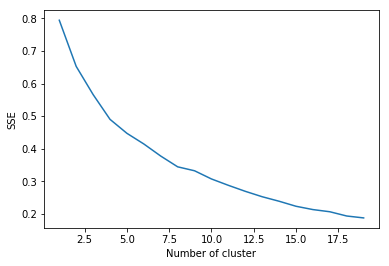

In [460]:
STL_grouped_clustering = STL_grouped.drop('ZipCode', 1)
sse={}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(STL_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

This is difficult to interpret. Alteratively, we can explore silhouette scores to see what maybe the optimal number of clusters.

For 2  Clusters  the average silhouette_score is : 0.16465279456333792
For 3  Clusters  the average silhouette_score is : 0.16979980586217155
For 4  Clusters  the average silhouette_score is : 0.20910853132701365
For 5  Clusters  the average silhouette_score is : 0.2159659500739034
For 6  Clusters  the average silhouette_score is : 0.20647028017579427
For 7  Clusters  the average silhouette_score is : 0.22325384875601562
For 8  Clusters  the average silhouette_score is : 0.21801845100625375
For 9  Clusters  the average silhouette_score is : 0.21502686043137162
For 10  Clusters  the average silhouette_score is : 0.22741873189010187
For 11  Clusters  the average silhouette_score is : 0.24296292566879513
For 12  Clusters  the average silhouette_score is : 0.22700662581180087
For 13  Clusters  the average silhouette_score is : 0.2588098478469901
For 14  Clusters  the average silhouette_score is : 0.23063085899750282
For 15  Clusters  the average silhouette_score is : 0.2570410866870086
For

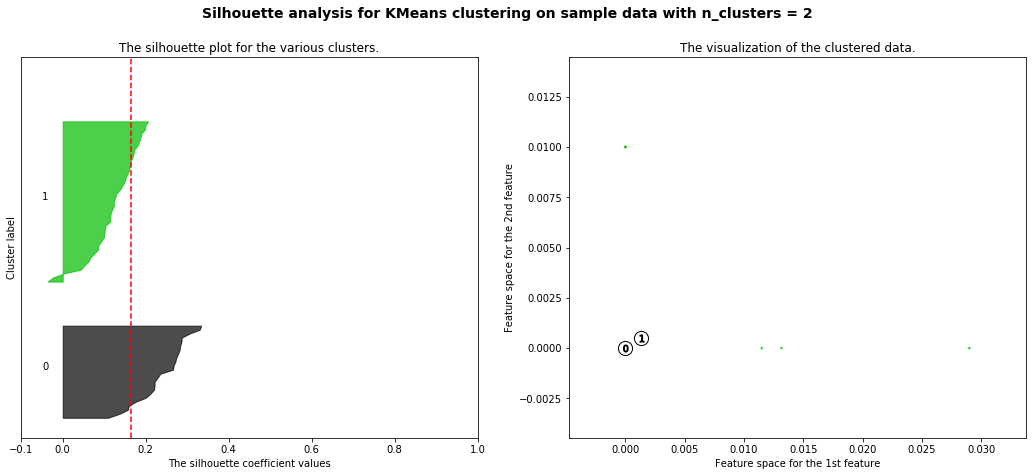

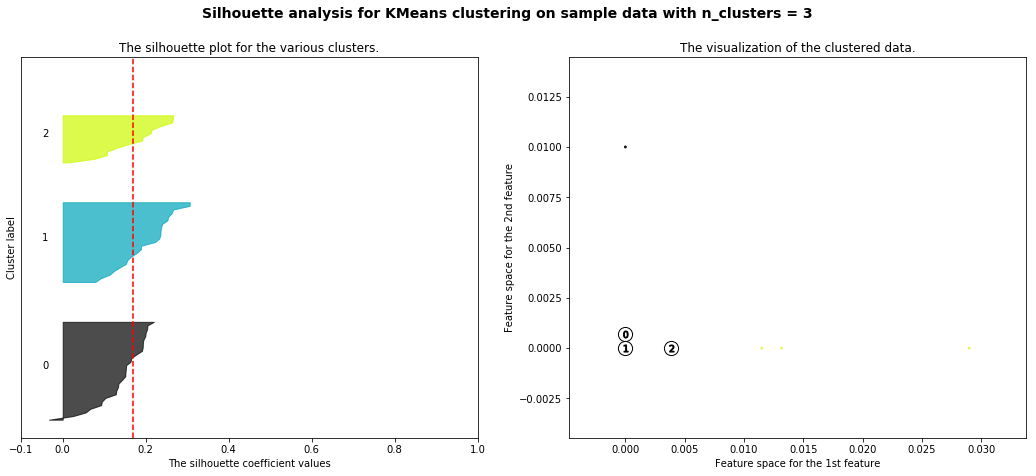

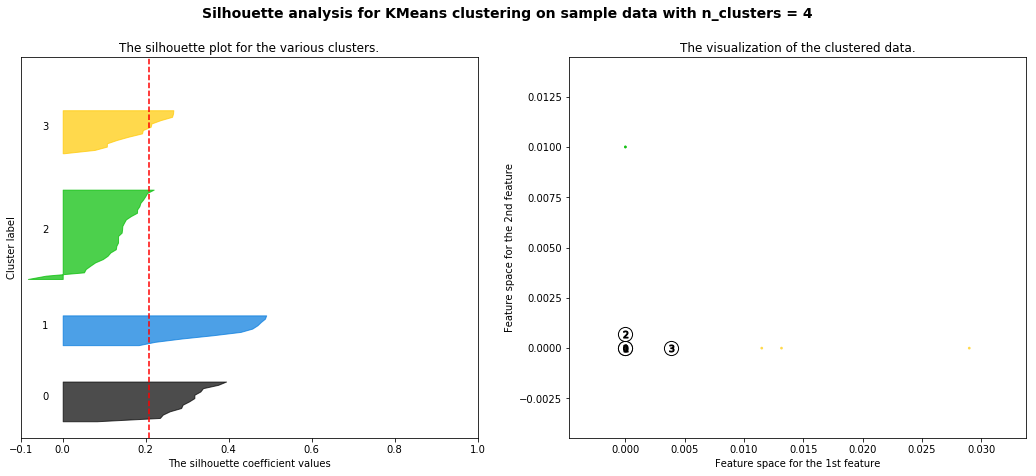

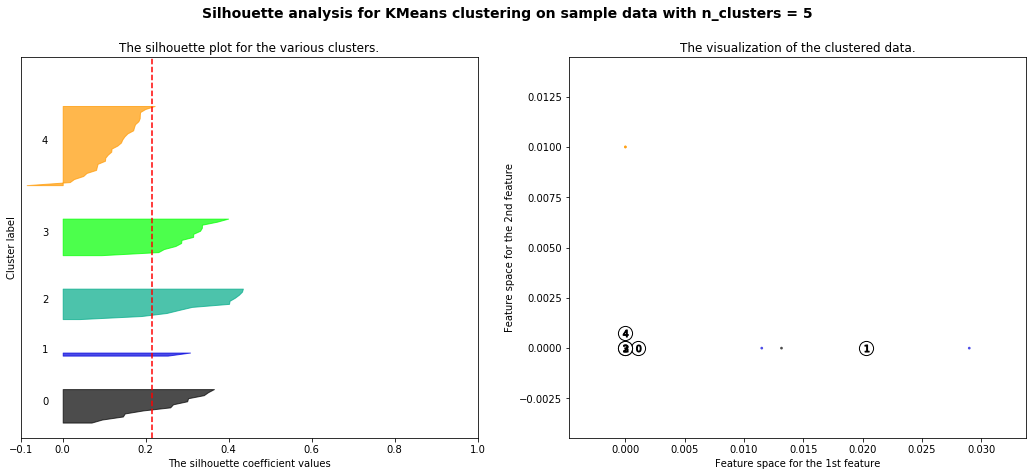

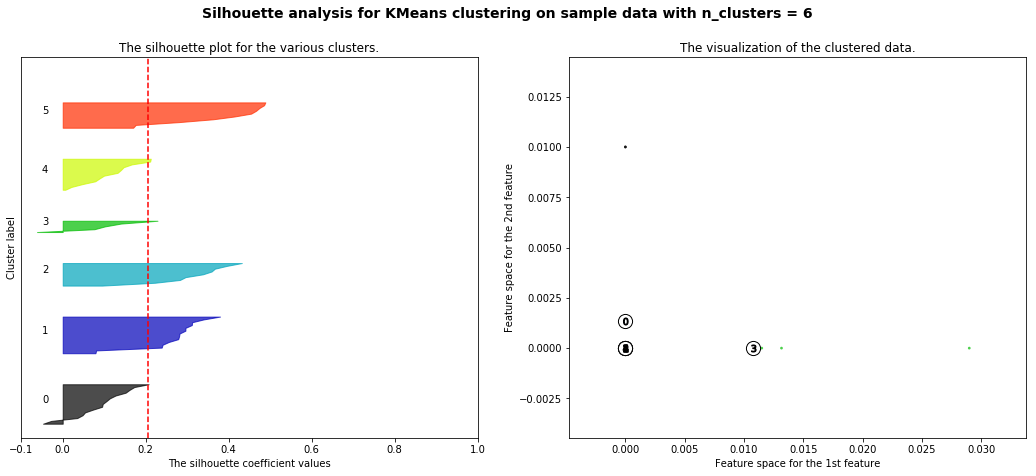

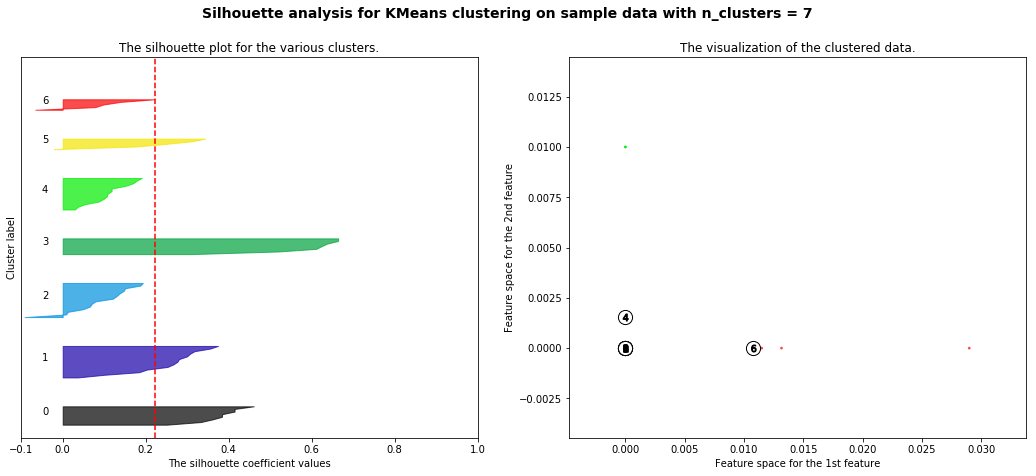

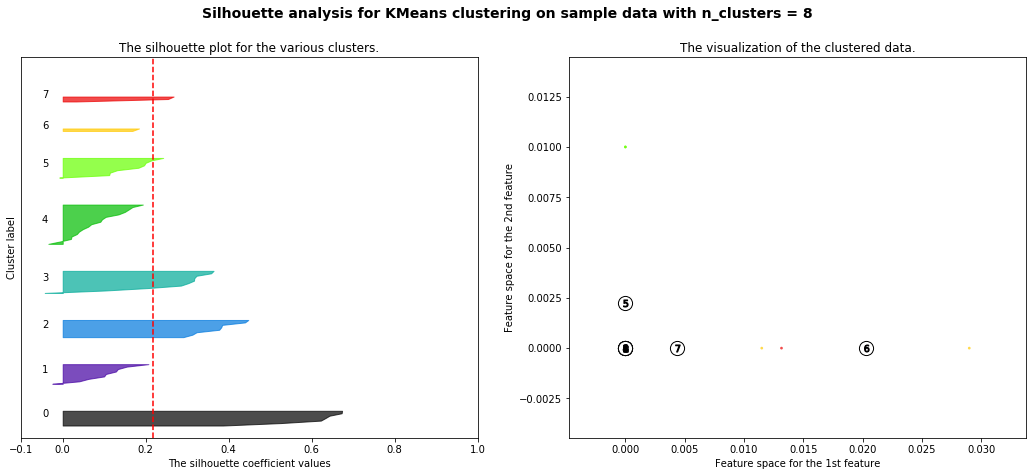

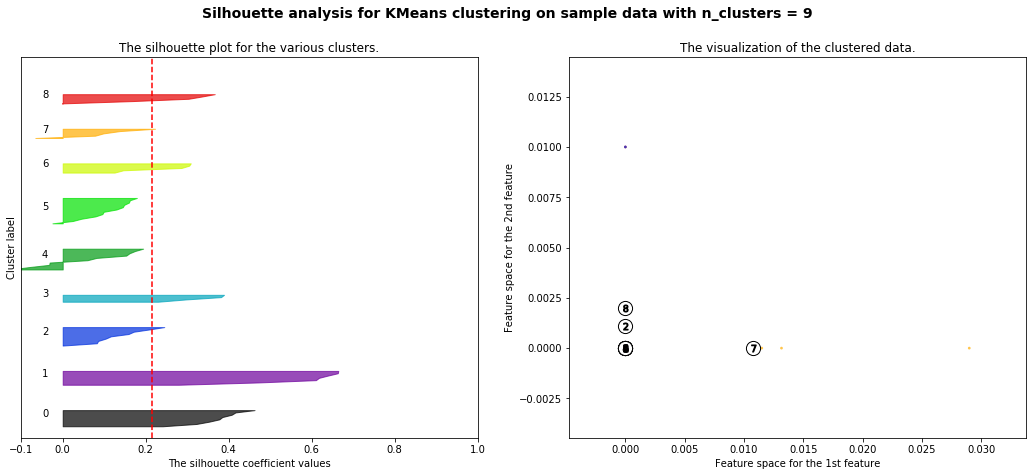

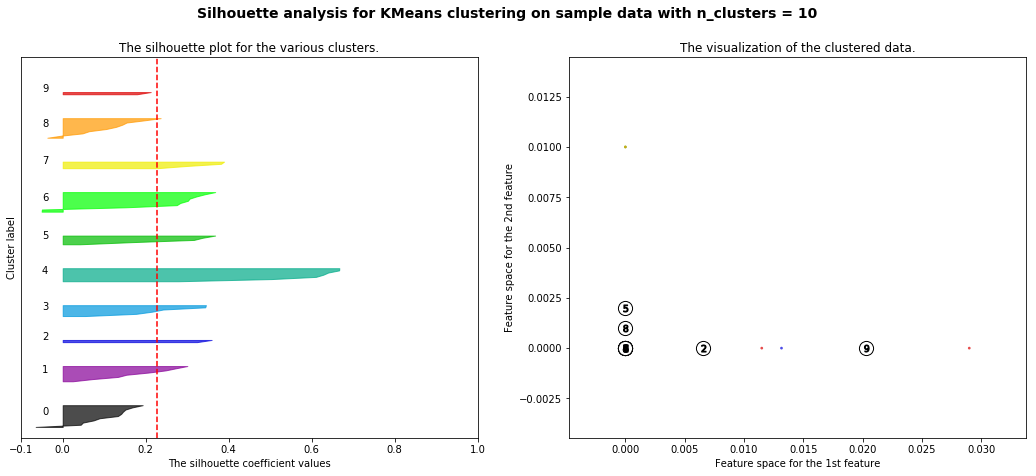

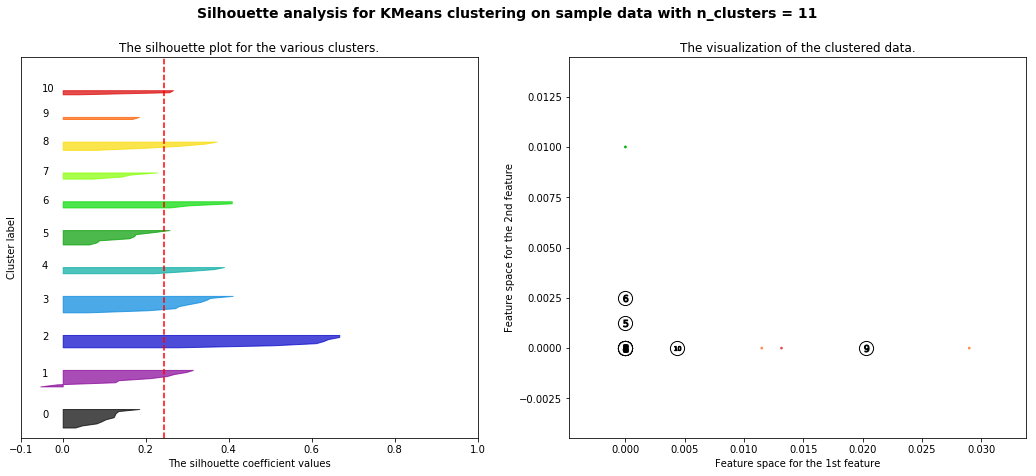

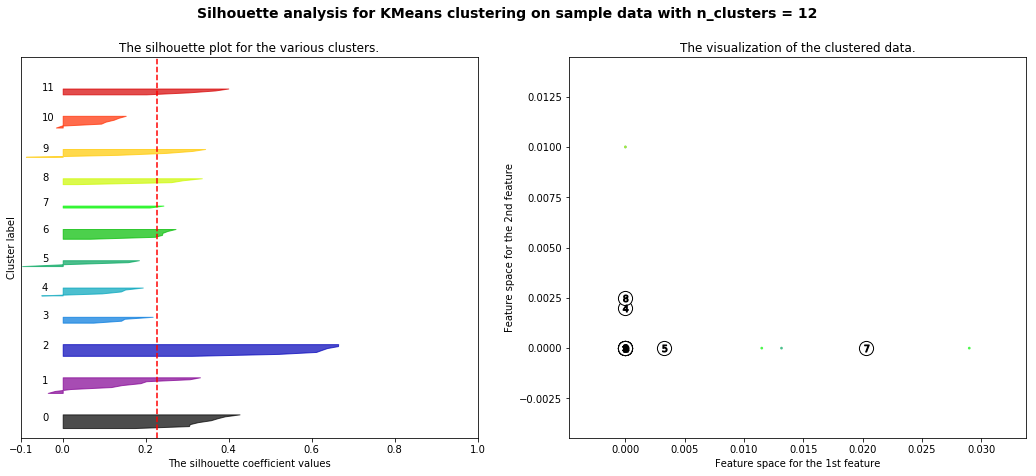

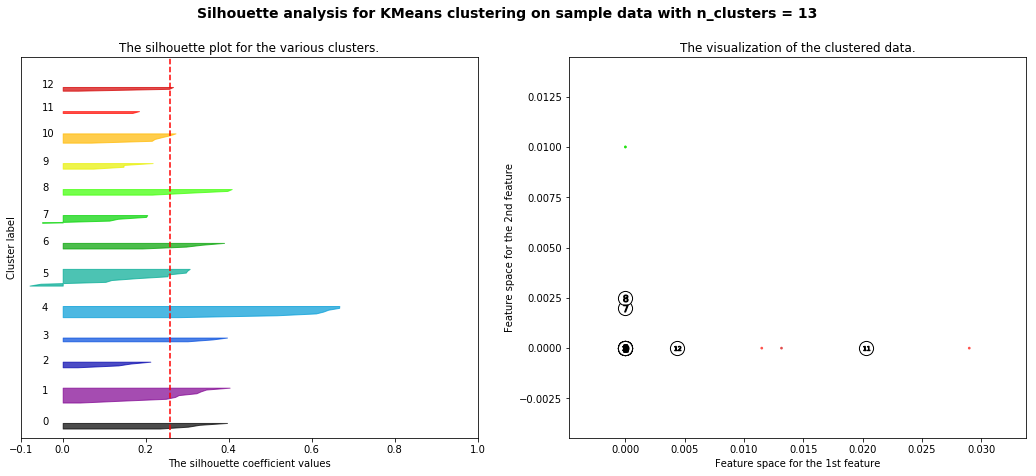

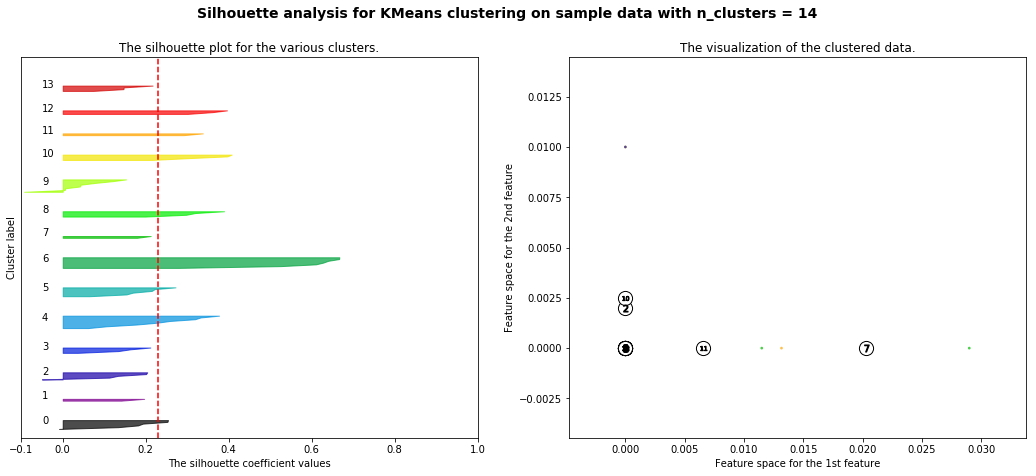

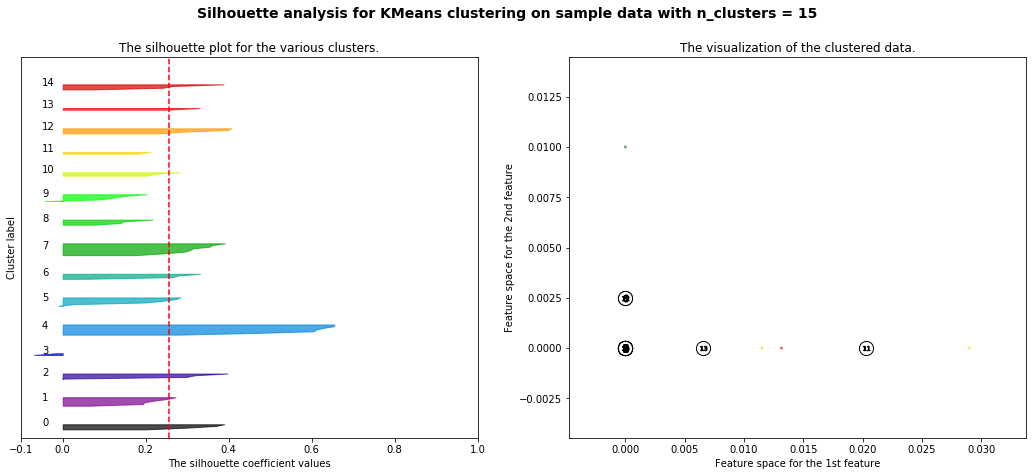

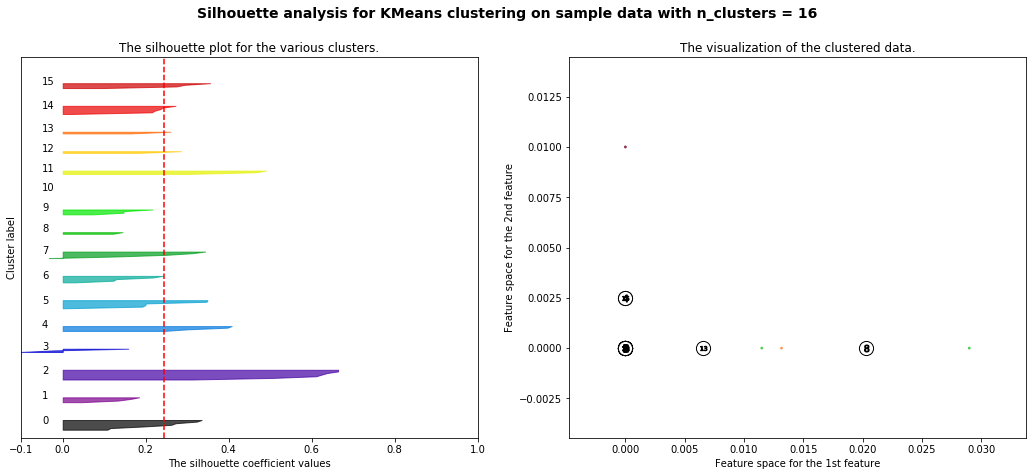

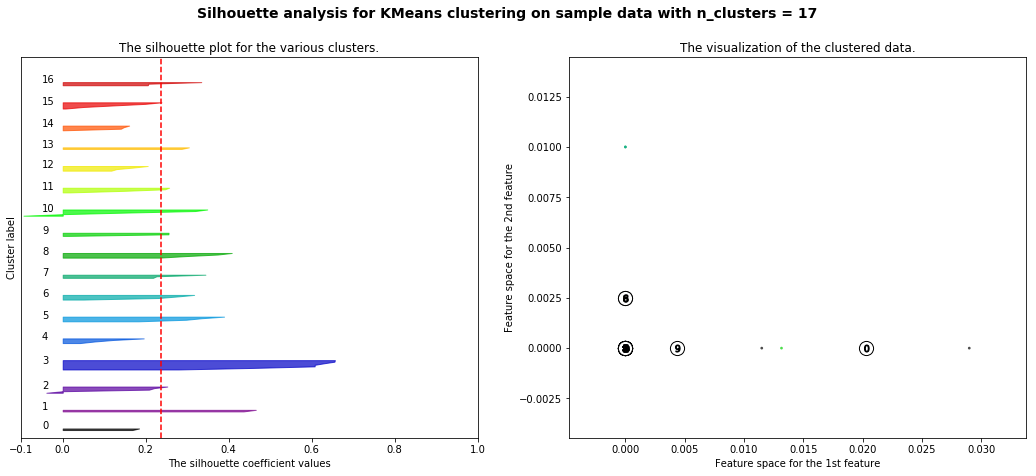

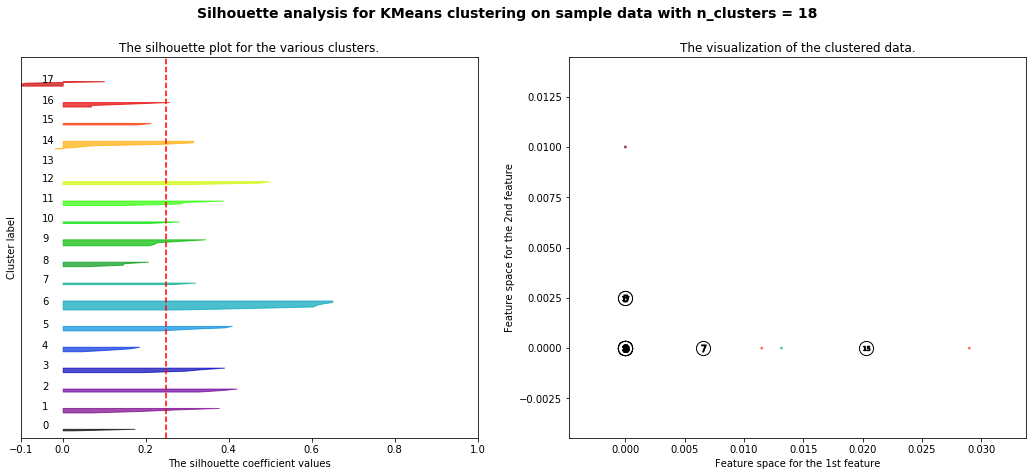

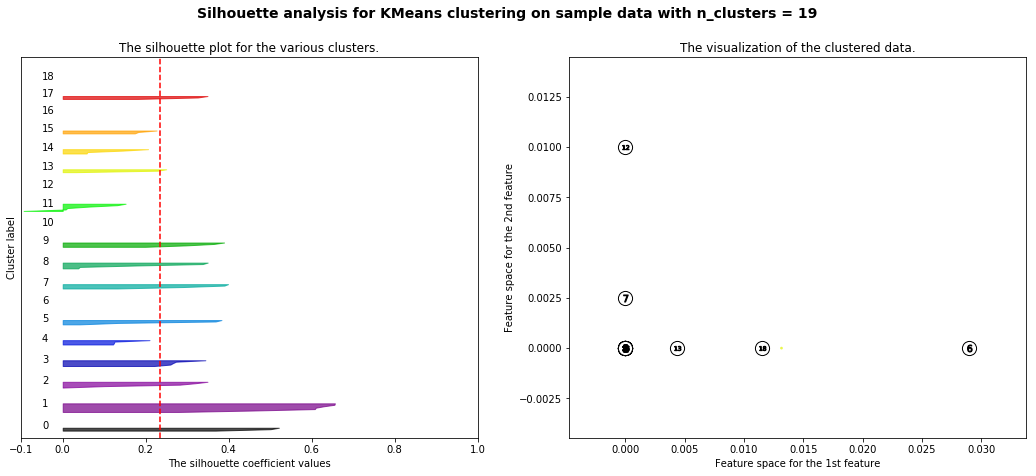

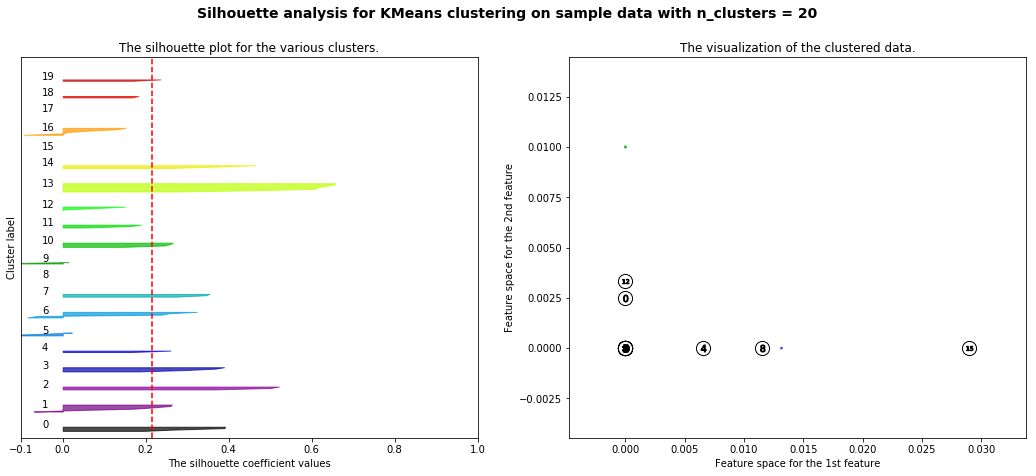

In [461]:
range_n_clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(STL_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(STL_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(STL_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(STL_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(STL_grouped_clustering.iloc[:, 0], STL_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the elbow plot and silhouette analysis, I believe that 5 is the optimal number of clusters before we begin to overfit the data. 

In [562]:
kclusters = 7

STL_grouped_clustering = STL_grouped.drop('ZipCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(STL_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 1, 3, 5, 4, 4, 4, 3, 4, 3, 3, 3, 6, 4, 3, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 4, 5, 5, 1, 3, 5, 5, 3,
       3, 2, 1, 1, 2, 4, 4, 4, 4, 6, 2, 4, 1, 2, 1, 1, 4, 0, 3, 3, 3])

In [563]:
STL_merged = df

# add clustering labels
STL_merged['Cluster Labels'] = kmeans.labels_

STL_merged = STL_merged.join(STL_venues_sorted.set_index('ZipCode'), on='ZipCode')


STL_merged.head()# check the last columns!

,ZipCode,AreaName,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63005,Chesterfield,38.656650,-90.586180,1,Fast Food Restaurant,Italian Restaurant,American Restaurant,Grocery Store,Sandwich Place,Hotel,Coffee Shop,Clothing Store,Pizza Place,Steakhouse
1,63011,Ballwin,38.600194,-90.542303,3,Pizza Place,Grocery Store,Mexican Restaurant,Liquor Store,Sandwich Place,Coffee Shop,Park,Bar,Breakfast Spot,American Restaurant
2,63017,Chesterfield,38.677780,-90.507360,1,Sandwich Place,Grocery Store,American Restaurant,Park,Italian Restaurant,Bakery,Korean Restaurant,Ice Cream Shop,Smoothie Shop,Lingerie Store
3,63021,Ballwin,38.564928,-90.523348,3,American Restaurant,Pizza Place,Park,Coffee Shop,Sandwich Place,Grocery Store,Ice Cream Shop,Bar,BBQ Joint,Mexican Restaurant
4,63026,Fenton,38.495220,-90.427090,5,American Restaurant,Italian Restaurant,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Park,BBQ Joint,Coffee Shop,Ice Cream Shop,Deli / Bodega


In [564]:
STL_merged['Diversity'] = fooddiv['Diversity']
STL_merged['All Ven'] = fooddiv['All Ven']
STL_merged.head()

,ZipCode,AreaName,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
0,63005,Chesterfield,38.656650,-90.586180,1,Fast Food Restaurant,Italian Restaurant,American Restaurant,Grocery Store,Sandwich Place,Hotel,Coffee Shop,Clothing Store,Pizza Place,Steakhouse,31,58
1,63011,Ballwin,38.600194,-90.542303,3,Pizza Place,Grocery Store,Mexican Restaurant,Liquor Store,Sandwich Place,Coffee Shop,Park,Bar,Breakfast Spot,American Restaurant,28,58
2,63017,Chesterfield,38.677780,-90.507360,1,Sandwich Place,Grocery Store,American Restaurant,Park,Italian Restaurant,Bakery,Korean Restaurant,Ice Cream Shop,Smoothie Shop,Lingerie Store,33,60
3,63021,Ballwin,38.564928,-90.523348,3,American Restaurant,Pizza Place,Park,Coffee Shop,Sandwich Place,Grocery Store,Ice Cream Shop,Bar,BBQ Joint,Mexican Restaurant,31,66
4,63026,Fenton,38.495220,-90.427090,5,American Restaurant,Italian Restaurant,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Park,BBQ Joint,Coffee Shop,Ice Cream Shop,Deli / Bodega,26,63


In [587]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
import matplotlib.colors as colors
from folium.plugins import HeatMap
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, zipcode, area , cluster, div, venues in zip(STL_merged['Latitude'], STL_merged['Longitude'], STL_merged['ZipCode'], STL_merged['AreaName'], STL_merged['Cluster Labels'], STL_merged['Diversity'], STL_merged['All Ven']):
    label = folium.Popup(str(zipcode)+': '+str(area) + ', Cluster: ' + str(cluster) + ', Div. Score: ' + str(div)+ ' , Total: ' + str(venues), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
food_venues_copy = food_venues.copy()
food_venues_copy['count'] = 1
#base_map = generateBaseMap()
#HeatMap(data=food_venues_copy[['Venue Latitude', 'Venue Longitude', 'count']].groupby(['Venue Latitude', 'Venue Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=10).add_to(map_clusters)      
map_clusters

['#8000ff', '#2c7ef7', '#2adddd', '#80ffb4', '#d4dd80', '#ff7e41', '#ff0000']


In [588]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
import matplotlib.colors as colors
from folium.plugins import HeatMap
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, zipcode, area , cluster, div, venues in zip(STL_merged['Latitude'], STL_merged['Longitude'], STL_merged['ZipCode'], STL_merged['AreaName'], STL_merged['Cluster Labels'], STL_merged['Diversity'], STL_merged['All Ven']):
    label = folium.Popup(str(zipcode)+': '+str(area) + ', Cluster: ' + str(cluster) + ', Div. Score: ' + str(div)+ ' , Total: ' + str(venues), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6*(div/STL_merged.loc[:,'Diversity'].mean()),
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
food_venues_copy = food_venues.copy()
food_venues_copy['count'] = 1
#base_map = generateBaseMap()
#HeatMap(data=food_venues_copy[['Venue Latitude', 'Venue Longitude', 'count']].groupby(['Venue Latitude', 'Venue Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=10).add_to(map_clusters)      
map_clusters

['#8000ff', '#2c7ef7', '#2adddd', '#80ffb4', '#d4dd80', '#ff7e41', '#ff0000']


I have included the diversity score of each zipcode as the relative size of each ploted zip code point. The clustering appears fall allong known socioeconomic lines within the city. The light blue cluster, cluster 3, seems to represent the suburban outlying areas which we would expect to be radically different from the rest of the city. The light green cluster, cluster 4, seems to represent the northern section of the city which is known to be one of the less affluent parts of the city. The red cluster, cluster 0, is representative of the down town area with is heavily populated by buisnesses. The dark blue cluster,  cluster 2, appears to be representative of the area around Forest park, Washington University, and Saint Louis University. The purple cluster, cluster 1, appears to represent the more affluent outlying communities, such as Ladue and brentwood. The green cluster, cluster 5, seems to represent an area of active businesses in an urban setting. 

In [589]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
import matplotlib.colors as colors
from folium.plugins import HeatMap
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, zipcode, area , cluster, div, venues in zip(STL_merged['Latitude'], STL_merged['Longitude'], STL_merged['ZipCode'], STL_merged['AreaName'], STL_merged['Cluster Labels'], STL_merged['Diversity'], STL_merged['All Ven']):
    label = folium.Popup(str(zipcode)+': '+str(area) + ', Cluster: ' + str(cluster) + ', Div. Score: ' + str(div)+ ' , Total: ' + str(venues), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6*(div/STL_merged.loc[:,'Diversity'].mean()),
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
food_venues_copy = food_venues.copy()
food_venues_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=food_venues_copy[['Venue Latitude', 'Venue Longitude', 'count']].groupby(['Venue Latitude', 'Venue Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=10).add_to(map_clusters)      
map_clusters

['#8000ff', '#2c7ef7', '#2adddd', '#80ffb4', '#d4dd80', '#ff7e41', '#ff0000']


In [579]:
from folium.plugins import HeatMap
def generateBaseMap(default_location=[latitude, longitude], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [580]:
df1=STL_merged.loc[STL_merged['Cluster Labels'] == 0,STL_merged.columns[[1] + list(range(5, STL_merged.shape[1]))]]
df1

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
16,St. Louis,Brewery,Hotel,American Restaurant,Sandwich Place,Bar,Pizza Place,BBQ Joint,Restaurant,Park,Ice Cream Shop,27,60
17,St. Louis,Brewery,Hotel,American Restaurant,Park,Sandwich Place,Pizza Place,Restaurant,BBQ Joint,Coffee Shop,Ice Cream Shop,28,62
18,St. Louis,Brewery,Hotel,BBQ Joint,Park,Sandwich Place,Pizza Place,Restaurant,Pub,American Restaurant,New American Restaurant,28,59
19,St. Louis,Brewery,Pizza Place,Coffee Shop,Park,BBQ Joint,Mexican Restaurant,American Restaurant,Restaurant,Bar,Hotel,34,67
21,St. Louis,Pizza Place,Brewery,Hotel,Sandwich Place,BBQ Joint,Ice Cream Shop,New American Restaurant,Park,Pub,Restaurant,27,61
22,St. Louis,Brewery,Ice Cream Shop,Coffee Shop,Pizza Place,Bar,Hotel,American Restaurant,Wine Bar,Sandwich Place,BBQ Joint,27,62
26,St. Louis,Coffee Shop,Mexican Restaurant,Pizza Place,Bar,Brewery,Park,Café,Bakery,Sandwich Place,Wine Bar,35,73
31,St. Louis,Coffee Shop,Pizza Place,Brewery,Sandwich Place,Italian Restaurant,Bar,Park,Bakery,Café,Mexican Restaurant,33,74
33,St. Louis,Coffee Shop,Brewery,Bar,Pizza Place,Mexican Restaurant,Sandwich Place,Ice Cream Shop,BBQ Joint,Bakery,Wine Bar,34,78
61,St. Louis,Brewery,Hotel,BBQ Joint,Park,Sandwich Place,Pizza Place,Wine Bar,Ice Cream Shop,American Restaurant,New American Restaurant,28,59


In [581]:
df2=STL_merged.loc[STL_merged['Cluster Labels'] == 1,STL_merged.columns[[1] + list(range(5, STL_merged.shape[1]))]]
df2

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
0,Chesterfield,Fast Food Restaurant,Italian Restaurant,American Restaurant,Grocery Store,Sandwich Place,Hotel,Coffee Shop,Clothing Store,Pizza Place,Steakhouse,31,58
2,Chesterfield,Sandwich Place,Grocery Store,American Restaurant,Park,Italian Restaurant,Bakery,Korean Restaurant,Ice Cream Shop,Smoothie Shop,Lingerie Store,33,60
29,Overland,Convenience Store,Breakfast Spot,Grocery Store,American Restaurant,Sandwich Place,Indian Restaurant,Pizza Place,Italian Restaurant,Park,Bar,39,65
34,Webster Groves,Italian Restaurant,Pizza Place,Sandwich Place,American Restaurant,Mexican Restaurant,Brewery,Grocery Store,Bar,Deli / Bodega,Bakery,33,65
39,Ladue,Italian Restaurant,Grocery Store,American Restaurant,Pizza Place,Chinese Restaurant,Sandwich Place,Hotel,Coffee Shop,Gym,Park,32,61
46,Des Peres,Grocery Store,Italian Restaurant,American Restaurant,Park,Coffee Shop,Restaurant,Steakhouse,Sandwich Place,Golf Course,Bakery,28,54
47,Olivette,Italian Restaurant,Grocery Store,American Restaurant,Breakfast Spot,Sandwich Place,Seafood Restaurant,Pizza Place,Chinese Restaurant,Gym,Steakhouse,35,67
56,Creve Coeur,Sandwich Place,American Restaurant,Italian Restaurant,Grocery Store,Burger Joint,Ice Cream Shop,Korean Restaurant,Bakery,Park,Restaurant,32,67
58,Brentwood,American Restaurant,Pizza Place,Grocery Store,Park,Sandwich Place,Coffee Shop,Seafood Restaurant,Restaurant,Gym,Italian Restaurant,30,62
59,Saint Louis,Sandwich Place,Italian Restaurant,Grocery Store,Bakery,American Restaurant,Burger Joint,Restaurant,Thai Restaurant,Pizza Place,Coffee Shop,34,70


In [592]:
df2.T

,0,2,29,34,39,46,47,56,58,59
AreaName,Chesterfield,Chesterfield,Overland,Webster Groves,Ladue,Des Peres,Olivette,Creve Coeur,Brentwood,Saint Louis
1st Most Common Venue,Fast Food Restaurant,Sandwich Place,Convenience Store,Italian Restaurant,Italian Restaurant,Grocery Store,Italian Restaurant,Sandwich Place,American Restaurant,Sandwich Place
2nd Most Common Venue,Italian Restaurant,Grocery Store,Breakfast Spot,Pizza Place,Grocery Store,Italian Restaurant,Grocery Store,American Restaurant,Pizza Place,Italian Restaurant
3rd Most Common Venue,American Restaurant,American Restaurant,Grocery Store,Sandwich Place,American Restaurant,American Restaurant,American Restaurant,Italian Restaurant,Grocery Store,Grocery Store
4th Most Common Venue,Grocery Store,Park,American Restaurant,American Restaurant,Pizza Place,Park,Breakfast Spot,Grocery Store,Park,Bakery
5th Most Common Venue,Sandwich Place,Italian Restaurant,Sandwich Place,Mexican Restaurant,Chinese Restaurant,Coffee Shop,Sandwich Place,Burger Joint,Sandwich Place,American Restaurant
6th Most Common Venue,Hotel,Bakery,Indian Restaurant,Brewery,Sandwich Place,Restaurant,Seafood Restaurant,Ice Cream Shop,Coffee Shop,Burger Joint
7th Most Common Venue,Coffee Shop,Korean Restaurant,Pizza Place,Grocery Store,Hotel,Steakhouse,Pizza Place,Korean Restaurant,Seafood Restaurant,Restaurant
8th Most Common Venue,Clothing Store,Ice Cream Shop,Italian Restaurant,Bar,Coffee Shop,Sandwich Place,Chinese Restaurant,Bakery,Restaurant,Thai Restaurant
9th Most Common Venue,Pizza Place,Smoothie Shop,Park,Deli / Bodega,Gym,Golf Course,Gym,Park,Gym,Pizza Place


In [582]:
df3=STL_merged.loc[STL_merged['Cluster Labels'] == 2,STL_merged.columns[[1] + list(range(5, STL_merged.shape[1]))]]
df3

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
20,Clayton,Zoo,Grocery Store,Sandwich Place,Italian Restaurant,Park,Brewery,Coffee Shop,Cocktail Bar,Greek Restaurant,Steakhouse,34,55
23,St. Louis,Zoo,Sandwich Place,Brewery,Coffee Shop,Bar,Ice Cream Shop,Italian Restaurant,Park,Pizza Place,Dessert Shop,27,60
24,St. Louis,Zoo,Italian Restaurant,Pizza Place,American Restaurant,Sandwich Place,Bakery,Brewery,Coffee Shop,Park,Deli / Bodega,33,62
25,St. Louis,Sandwich Place,Coffee Shop,Bar,Zoo,Brewery,New American Restaurant,Italian Restaurant,Ice Cream Shop,Bakery,Pizza Place,36,70
27,St. Louis,Zoo,Italian Restaurant,Sandwich Place,Pizza Place,Bar,American Restaurant,Park,Grocery Store,Brewery,Taco Place,28,58
28,St. Louis,Zoo,Sandwich Place,Brewery,Bar,Coffee Shop,Ice Cream Shop,Taco Place,Italian Restaurant,Pizza Place,American Restaurant,24,57
30,St. Louis,Zoo,Bar,Ice Cream Shop,Coffee Shop,Sandwich Place,American Restaurant,Pizza Place,Movie Theater,Brewery,Grocery Store,25,50
32,Richmond Heights,Zoo,Italian Restaurant,Sandwich Place,Grocery Store,Brewery,Park,Coffee Shop,Hotel,American Restaurant,Gym,32,56
35,St. Louis,Zoo,Theater,American Restaurant,Grocery Store,Coffee Shop,Art Museum,Taco Place,Pizza Place,Cocktail Bar,Ice Cream Shop,32,49
45,University City,Zoo,Pizza Place,Grocery Store,Sandwich Place,Park,Chinese Restaurant,Coffee Shop,American Restaurant,Burger Joint,Vegetarian / Vegan Restaurant,30,54


In [583]:
df4=STL_merged.loc[STL_merged['Cluster Labels'] == 3,STL_merged.columns[[1] + list(range(5, STL_merged.shape[1]))]]
df4

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
1,Ballwin,Pizza Place,Grocery Store,Mexican Restaurant,Liquor Store,Sandwich Place,Coffee Shop,Park,Bar,Breakfast Spot,American Restaurant,28,58
3,Ballwin,American Restaurant,Pizza Place,Park,Coffee Shop,Sandwich Place,Grocery Store,Ice Cream Shop,Bar,BBQ Joint,Mexican Restaurant,31,66
8,Wildwood,Pizza Place,American Restaurant,Park,Mexican Restaurant,Fast Food Restaurant,Bar,Convenience Store,Coffee Shop,Sandwich Place,Supermarket,24,59
10,Maryland Heights,Pizza Place,Italian Restaurant,Coffee Shop,Convenience Store,Mexican Restaurant,Sandwich Place,American Restaurant,BBQ Joint,Smoothie Shop,Trail,30,66
11,Bridgeton,Pizza Place,Sandwich Place,Convenience Store,Coffee Shop,Italian Restaurant,Bakery,Fast Food Restaurant,Donut Shop,Mexican Restaurant,Café,31,64
12,Earth City,American Restaurant,Sandwich Place,Ice Cream Shop,Breakfast Spot,Pizza Place,Grocery Store,Mexican Restaurant,Convenience Store,Park,Coffee Shop,32,63
15,Valley Park,American Restaurant,Coffee Shop,Park,Sandwich Place,BBQ Joint,Grocery Store,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Supermarket,27,55
40,Lemay,Bakery,Mexican Restaurant,Park,Pizza Place,Coffee Shop,Bar,BBQ Joint,Brewery,Gym,Deli / Bodega,39,73
43,Concord,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Convenience Store,Coffee Shop,American Restaurant,Sandwich Place,Pizza Place,Deli / Bodega,Park,24,60
44,Oakville,American Restaurant,Pizza Place,Sandwich Place,Fast Food Restaurant,Convenience Store,Deli / Bodega,Italian Restaurant,Coffee Shop,Park,Ice Cream Shop,27,63


In [584]:
df5=STL_merged.loc[STL_merged['Cluster Labels'] == 4,STL_merged.columns[[1] + list(range(5, STL_merged.shape[1]))]]
df5

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
5,Florissant,Mexican Restaurant,Convenience Store,Chinese Restaurant,Pharmacy,Bar,Fast Food Restaurant,Donut Shop,American Restaurant,Grocery Store,Coffee Shop,26,57
6,Florissant,Mexican Restaurant,Pharmacy,Convenience Store,Grocery Store,Donut Shop,American Restaurant,Bar,Pizza Place,Chinese Restaurant,Park,26,58
7,Old Jamestown,Pharmacy,Mexican Restaurant,Sandwich Place,Convenience Store,Grocery Store,Fast Food Restaurant,American Restaurant,Chinese Restaurant,Bar,Park,28,58
9,Hazelwood,Mexican Restaurant,Fast Food Restaurant,Convenience Store,Bar,Donut Shop,Italian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Chinese Restaurant,29,67
14,St. Ann,Convenience Store,Mexican Restaurant,Pizza Place,Chinese Restaurant,Donut Shop,Sandwich Place,Coffee Shop,Restaurant,Ice Cream Shop,Bar,29,66
36,Northwoods,Grocery Store,Convenience Store,Chinese Restaurant,Pizza Place,Ice Cream Shop,Diner,Park,Taco Place,Coffee Shop,BBQ Joint,39,59
49,Berkeley,Convenience Store,Mexican Restaurant,Bar,Chinese Restaurant,Grocery Store,Donut Shop,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Ice Cream Shop,27,61
50,Ferguson,Convenience Store,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Diner,Coffee Shop,Bar,Ice Cream Shop,Park,Pizza Place,26,58
51,Jennings,Discount Store,Convenience Store,Fast Food Restaurant,Grocery Store,Diner,Pharmacy,Chinese Restaurant,Sandwich Place,Pizza Place,Bar,23,50
52,Bellefontaine Neighbors,Grocery Store,Sandwich Place,Bar,Pizza Place,Park,Fast Food Restaurant,Convenience Store,Pharmacy,Chinese Restaurant,American Restaurant,16,31


In [585]:
df6=STL_merged.loc[STL_merged['Cluster Labels'] == 5,STL_merged.columns[[1] + list(range(5, STL_merged.shape[1]))]]
df6

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
4,Fenton,American Restaurant,Italian Restaurant,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Park,BBQ Joint,Coffee Shop,Ice Cream Shop,Deli / Bodega,26,63
37,Kirkwood,Grocery Store,Italian Restaurant,Mexican Restaurant,Pizza Place,Bakery,Coffee Shop,Park,Steakhouse,Breakfast Spot,Department Store,25,54
38,Affton,Italian Restaurant,Ice Cream Shop,Pizza Place,Deli / Bodega,Grocery Store,Mexican Restaurant,American Restaurant,Breakfast Spot,Trail,Coffee Shop,23,57
41,Crestwood,Italian Restaurant,Ice Cream Shop,Coffee Shop,Pizza Place,Grocery Store,Bakery,Park,Breakfast Spot,Mexican Restaurant,Trail,23,58
42,Sunset Hills,Italian Restaurant,American Restaurant,Park,Pizza Place,Mexican Restaurant,Steakhouse,Coffee Shop,Ice Cream Shop,Grocery Store,Breakfast Spot,27,58


In [586]:
df7=STL_merged.loc[STL_merged['Cluster Labels'] == 6,STL_merged.columns[[1] + list(range(5, STL_merged.shape[1]))]]
df7

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Diversity,All Ven
13,High Ridge,Fast Food Restaurant,Park,Grocery Store,Pizza Place,American Restaurant,Discount Store,ATM,Bar,Diner,Salon / Barbershop,16,34
53,Spanish Lake,Fast Food Restaurant,Park,Discount Store,Convenience Store,Bar,Grocery Store,Sandwich Place,Pizza Place,Bridge,Pharmacy,13,34
